## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

## Data Loading

In [2]:
datadict = pd.read_excel('D:/UPGRAD/Main_course/Lending_Club_Case_Study/Data_Dictionary.xlsx')

In [3]:
loan = pd.read_csv('D:/UPGRAD/Main_course/Lending_Club_Case_Study/loan.csv')

D:\Jupiter\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data Understanding

In [4]:
datadict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [5]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Data Cleaning

In [10]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [11]:
round(loan.isnull().sum()/len(loan.index),2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [108]:
#There are some columns having 100% missing values .Need to get rid of them .

In [12]:
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) >90]

In [13]:
missing_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [17]:
loan = loan.drop(missing_columns, axis=1)
loan.shape

(39717, 55)

In [19]:
round(loan.isnull().sum()/len(loan.index),2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [22]:
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [23]:
loan = loan.drop(['desc', 'mths_since_last_delinq'],axis = 1)

In [24]:
loan.shape

(39717, 53)

In [25]:
loan.isnull().sum(axis =1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [27]:
len(loan[loan.isnull().sum(axis =1)>5].index)
 

0

In [31]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [32]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

## Data Analysis

In [110]:
# The customer behaviour variables are not available at the time of loan application, and thus they cannot 
# be used as predictors for credit approval.

behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

In [34]:
df = loan.drop(behaviour_var, axis = 1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [111]:
#Convert Emp_Length to numaric value 

loan = loan[~loan['emp_length'].isnull()]
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [112]:
# Variables zip code, address, state etc are not required .
df = loan.drop(['title', 'url', 'zip_code', 'addr_state'], axis =1)

In [80]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [113]:
# Get rid of the loan with Current status as current Applications can not said as Defaulter or non Defaulter
df = df[df['loan_status'] != 'Current']

In [82]:
df['loan_status'] = df['loan_status'].apply(lambda x : 0 if x == 'Fully Paid' else 1)

In [83]:
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [43]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [44]:
#Charged Off Rate 
round(np.mean(df['loan_status']),2)

0.15

In [114]:
# Overall default rate is 15%

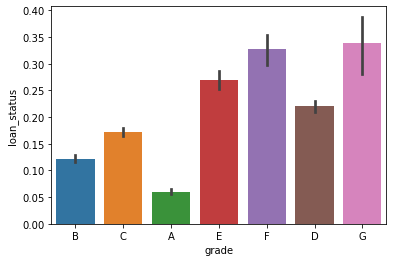

In [46]:
sns.barplot(x='grade', y = 'loan_status', data = df)
plt.show()

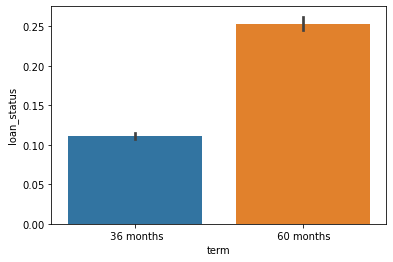

In [48]:
plot_cat('term')

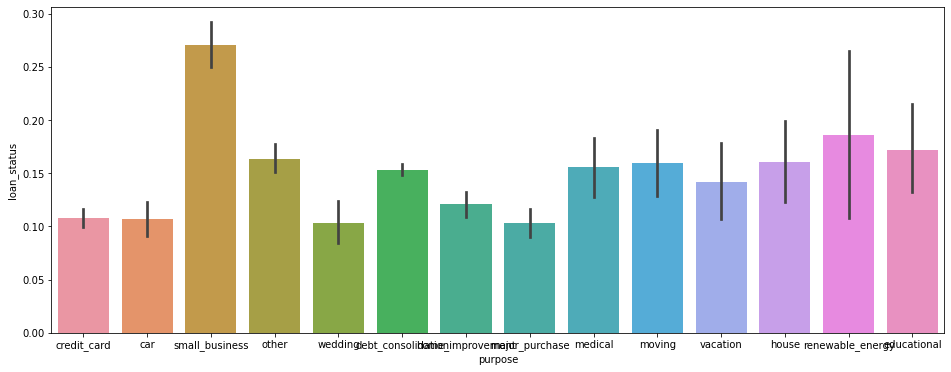

In [49]:
plt.figure(figsize=(16, 6))
plot_cat('purpose')

In [115]:
# Small Business loans defaults the most , then renewable energy and education 

In [53]:
#bining the loan amount 
def loan_amount(n):
    if n < 1000:
        return 'low'
    elif n >= 1000 and n <15000:
        return 'medium'
    elif n >= 15000 and n <25000:
        return 'high'
    else:
        return 'vary high'

df['loan_amnt'] = df['loan_amnt'].apply(lambda x : loan_amount(x))

In [55]:
df['loan_amnt'].value_counts()

medium       28107
high          7696
vary high     2762
low             12
Name: loan_amnt, dtype: int64

In [116]:
#define a function for ploting the bar plots
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

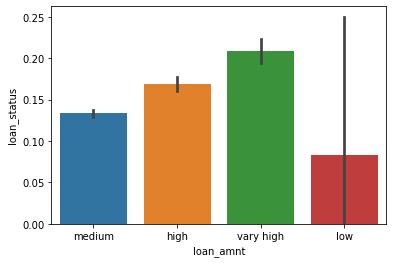

In [57]:
plot_cat('loan_amnt')

In [117]:
# Higher the loan amount higher the default rate 

In [59]:
#bining the funded amount 

def funded_amount(n):
    if n < 1000:
        return 'low'
    elif n >= 1000 and n <15000:
        return 'medium'
    elif n >= 15000 and n <25000:
        return 'high'
    else:
        return 'vary high'
df['funded_amnt'] = df['funded_amnt'].apply(lambda x : funded_amount(x))

In [60]:
df['funded_amnt'].value_counts()

medium       28678
high          7539
vary high     2348
low             12
Name: funded_amnt, dtype: int64

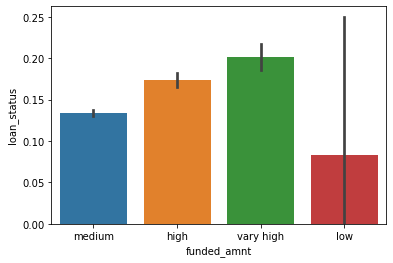

In [61]:
plot_cat('funded_amnt')

In [118]:
# Higher amount funded gets higher rate of defaulter 

In [62]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
df['dti'] = df['dti'].apply(lambda x: dti(x))

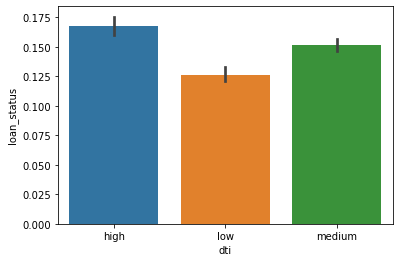

In [63]:
plot_cat('dti')

In [119]:
# Higer interest rate higher rate of defaulters 

In [73]:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

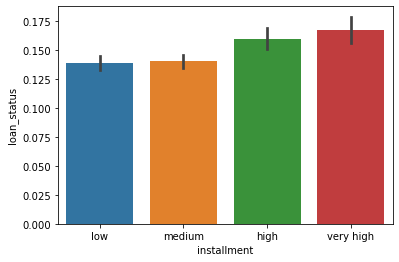

In [74]:
plot_cat('installment')

In [120]:
# Higher the installment rate higher the default rate 

In [75]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

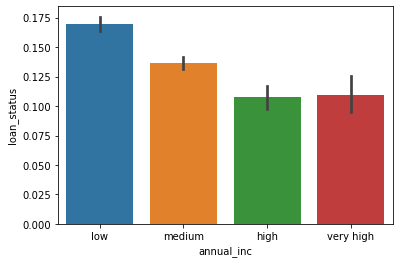

In [76]:
plot_cat('annual_inc')

In [121]:
# Lower the annual income higher the defaulter rate 

#### Insight of Univariate analysis

###### 1. Overall default rate is 15%.
###### 2. Higher the loan amount higher the default rate. 
###### 3. Lower the annual income higher the defaulter rate.
###### 4. Higer interest rate higher rate of defaulters.
###### 5. Higher the installment rate higher the default rate.
###### 6. Higher amount funded gets higher rate of defaulter . 


## Bivarient Analysis 

In [86]:
cross_df = pd.crosstab(df['emp_length'], df['loan_status'])

In [87]:
cross_df

loan_status,0,1
emp_length,,
1,6582,1095
2,3724,567
3,3457,555
4,2880,462
5,2736,458
6,1861,307
7,1448,263
8,1232,203
9,1068,158


In [88]:
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)

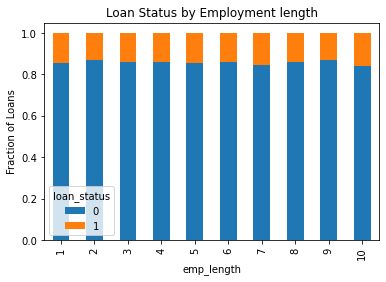

In [89]:
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.title('Loan Status by Employment length')
plt.show()

In [122]:
# Almost all the categories of employment length are showing consistent percentage of people in those categories paying off the loan.

In [90]:
df['pub_rec_bankruptcies'].value_counts()

0.0    35312
1.0     1530
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

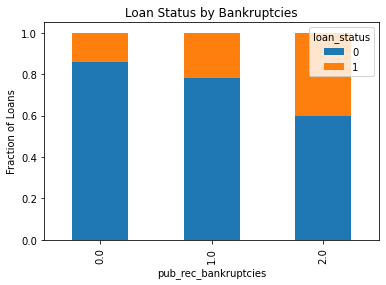

In [94]:
cross_df = pd.crosstab(df['pub_rec_bankruptcies'], df['loan_status'])
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.title('Loan Status by Bankruptcies')
plt.show()

In [123]:
# Recorded Bankruptcies and increase in cases of Charged Off loan status

In [ ]:
#Changed the Grades 'A','B','C','D','E','F','G' to numarical values as 1,2,3,4,5,6,7 
df["grade"] = df["grade"].replace (['A','B','C','D','E','F','G'],[1,2,3,4,5,6,7])

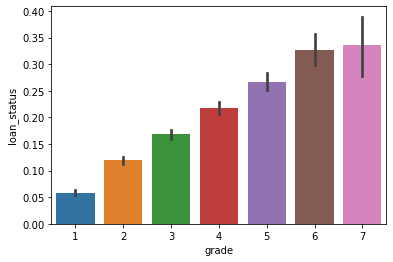

In [101]:
plot_cat('grade')

In [124]:
# 'F' and 'G' grade customers are tends to be Defaulters 

In [103]:
#Convert the subgrades to numarical values 
df["sub_grade"] = df["sub_grade"].replace (['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'],
                                                                       [11,12,13,14,15,21,22,23,24,25,31,32,33,34,35,41,42,43,44,45,51,52,53,54,55,61,62,63,64,65,71,72,73,74,75])

<AxesSubplot:xlabel='sub_grade', ylabel='loan_status'>

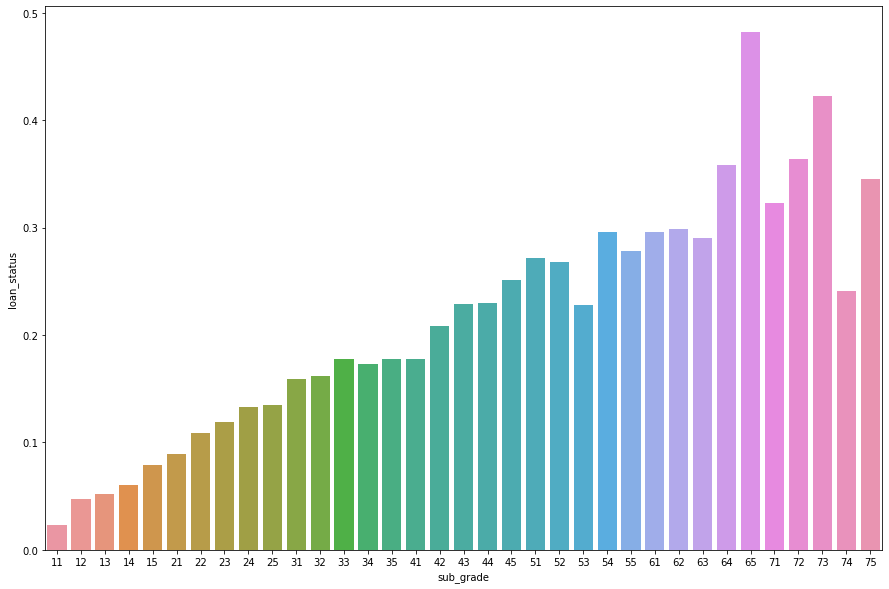

In [106]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x = df["sub_grade"], y = df["loan_status"], ci=None, ax=ax )


In [125]:
# The subgrades 'E3','F1','F2','F5' are more tends to be defaulters  
# The Subgrades A1 to A5 have less chance to be defaulters
  

### Insight of Bivariate analysis

###### 1. Recorded Bankruptcies and increase in cases of Charged Off loan status
###### 2. 'F' and 'G' grade customers are tends to be Defaulters 
###### 3. The subgrades 'E3','F1','F2','F5' are more tends to be defaulters  
###### 4. The Subgrades A1 to A5 have less chance to be defaulters